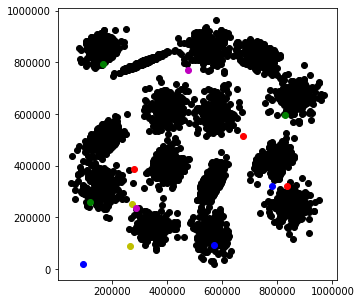

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("s1.csv")

np.random.seed(300)
k = 15
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, df["x"].max()), np.random.randint(0, df["y"].max())]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'm', 5: 'y', 6: 'w', 7: 'r', 8: 'g', 9:'b', 10: 'r',11: 'g', 12: 'b', 13: 'm', 14: 'y', 15: 'w'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
# plt.xlim(0, 80)
# plt.ylim(0, 80)
plt.show()

        x       y  distance_from_1  distance_from_2  distance_from_3  \
0  550946  664159    445516.799994    402638.318525    790579.938843   
1  557965  665845    442353.369568    408761.079324    796017.798243   
2  575538  597173    379127.675383    450888.578832    752311.457981   
3  551446  618600    411265.915498    419960.903499    754111.145730   
4  608046  635690    387883.472979    465938.441136    802711.415313   

   distance_from_4  distance_from_5  distance_from_6  distance_from_7  \
0    128482.028790    496511.549873    296702.183903    192091.977201   
1    131296.579959    501838.773440    303697.827733    189000.390820   
2    198307.168428    458145.292239    329194.905302    127195.037643   
3    168075.120648    459639.894885    301412.756213    159414.702107   
4    187040.914457    508542.080786    355330.703075    136080.907948   

   distance_from_8  distance_from_9  distance_from_10  distance_from_11  \
0    588824.926498    412107.016152     386662.845111

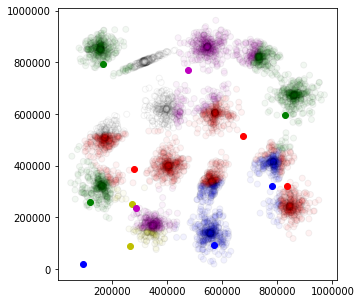

In [2]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.05, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

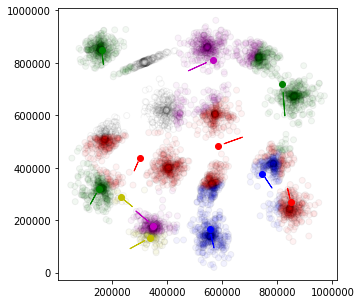

In [3]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.05, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

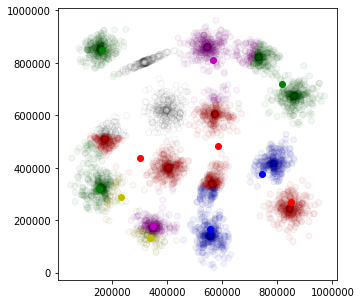

In [4]:
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.05, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

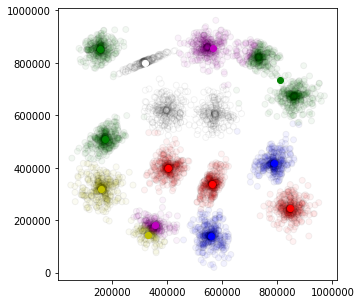

In [5]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.05, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()